In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
#reading the .csv file as a dataframe (df)
bic=pd.read_csv('../week2/nyc-east-river-bicycle-counts.csv')

In [3]:
#outputing first 5 lines of df
bic.head(5)

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


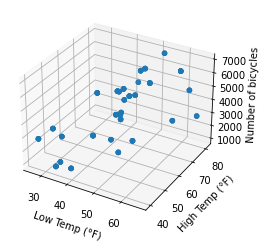

In [4]:
#plotting the dependence of the number of cyclists 
#who drove across the Manhattan bridge 
#on the minimum and the maximum temperature during the day
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bic['Low Temp (°F)'], bic['High Temp (°F)'], bic['Manhattan Bridge'])
ax.set_xlabel('Low Temp (°F)')
ax.set_ylabel('High Temp (°F)')
ax.set_zlabel('Number of bicycles')
plt.show()
#the graph shows a positive linear correlation

### We want to build a line that most accurately reflects the revealed dependence

In [5]:
#building a list of minimum daytime temperatures 
#in order to then run the gradient descent algorithm on these values
x1 = np.asarray(bic['Low Temp (°F)'].tolist())
x1[:5]

array([66. , 48.9, 34. , 33.1, 26.1])

In [6]:
#building a list of maximum daytime temperatures 
x2 = np.asarray(bic['High Temp (°F)'].tolist())
x2[:5]

array([78.1, 55. , 39.9, 44.1, 42.1])

In [7]:
#list of the numbers of cyclists who rode on the Manhattan bridge in a day
Y = np.asarray(bic['Manhattan Bridge'].tolist())
Y[:5]

array([3126, 1646, 1232, 1067, 2617])

In [8]:
x0 = np.ones(Y.shape[0])
x0[:5]

array([1., 1., 1., 1., 1.])

In [9]:
X = np.transpose(np.vstack((x0, x1, x2)))
X[:6, :2]


array([[ 1. , 66. ],
       [ 1. , 48.9],
       [ 1. , 34. ],
       [ 1. , 33.1],
       [ 1. , 26.1],
       [ 1. , 30. ]])

### Hypothesis:
### h(x1, x2) = a + b*x1 + c*x2
### h(x0, x1, x2) = a*x0 + b*x1 + c*x2, where x0 is vector-column of ones
### h(X) = X*theta, where theta = (a, b, c) and X = (x0, x1, x2) (xi are columns)

In [10]:
#selecting the starting values 
#for the gradient descent algorithm - the coefficients of the line
a=0
b=0
c=Y[1]/(X[0][2])
c

21.075544174135725

In [11]:
#The gradient descent function itself. 
#We start with the values of the coefficients a, b and c described above, 
#and gradually changing these values, we approach those 
#at which the loss function will be at a local minimum 
#(that is, our line will be the least different from the desired one).

def graddesc(X, Y, m, alpha, theta):
    
    a=theta[0]
    b=theta[1]
    c=theta[2]
    
    suma_list = (np.dot(X, theta) - Y)*X[:, 0]
    suma = np.sum(suma_list)
    sumb_list = (np.dot(X, theta) - Y)*X[:, 1]
    sumb = np.sum(sumb_list)
    sumc_list = (np.dot(X, theta) - Y)*X[:, 2]
    sumc = np.sum(sumc_list)
    
    if (abs((alpha/m)*suma)>0.005 or abs((alpha/m)*sumb)>0.005) or abs((alpha/m)*sumc)>0.005:
        a -= (alpha/m)*suma
        b -= (alpha/m)*sumb
        c -= (alpha/m)*sumc
        return graddesc(X, Y, m, alpha, [a, b, c])
    
    else:
        return [a, b, c]

In [12]:
#getting the final coefficients of the line
coef = graddesc(X, Y, Y.shape[0], 0.000001, [a, b, c])
print(coef)

[0.4199644148892546, 20.93867555168807, 50.93385575155895]


### What does this line look like:

In [13]:
#two points that will define our straight line
x_axes = [x1.min(), x1.max()]
y_axes = [x2.min(), x2.max()]

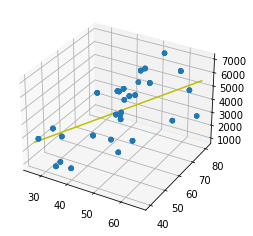

In [14]:
#plotting the 3d-graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bic['Low Temp (°F)'], bic['High Temp (°F)'], bic['Manhattan Bridge'])

#adding a straight line to the same graph
ax.plot(x_axes, y_axes, [coef[0] + coef[1]*x_axes[i] + coef[2]*y_axes[i] for i in range(len(x_axes))], c='y')
plt.show()

### Normal Equation - method to solve for theta analytically
### theta = [((X^T) * X) ^ (-1)] * X^T * Y

In [15]:
from numpy import linalg as la
temp = la.inv(np.dot(np.transpose(X), X))
coef_ne = np.dot(np.dot(temp, np.transpose(X)), Y)
coef_ne

array([-2321.31193495,   -71.44740487,   159.90355705])

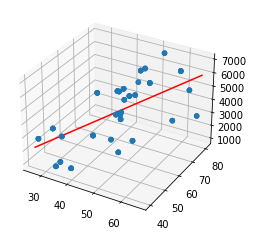

In [16]:
#plotting the 3d-graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bic['Low Temp (°F)'], bic['High Temp (°F)'], bic['Manhattan Bridge'])

#adding a straight line to the same graph
ax.plot(x_axes, y_axes, [coef_ne[0]+coef_ne[1]*x_axes[i]+coef_ne[2]*y_axes[i] for i in range(len(x_axes))], c='r')
plt.show()